In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [24]:
stock = pd.read_csv('C:/Users/User/Desktop/stock.DAT.csv'
                    ,header=None, delim_whitespace=True)
stock.columns = ['X1', 'X2', 'X3', 'X4', 'X5']
stock.corr()

,X1,X2,X3,X4,X5
X1,1.000000,0.576924,0.508656,0.386721,0.462178
X2,0.576924,1.000000,0.598384,0.389519,0.321953
X3,0.508656,0.598384,1.000000,0.436101,0.425627
X4,0.386721,0.389519,0.436101,1.000000,0.523529
X5,0.462178,0.321953,0.425627,0.523529,1.000000


In [25]:
eigenValues, eigenVectors = np.linalg.eig(stock.corr())
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [26]:
# Case 0: p factors
loadings_p = pd.DataFrame()
loadings_p['Factor1'] = np.sqrt(eigenValues[0])*eigenVectors[:,0]
loadings_p['Factor2'] = np.sqrt(eigenValues[1])*eigenVectors[:,1]
loadings_p['Factor3'] = np.sqrt(eigenValues[2])*eigenVectors[:,2]
loadings_p['Factor4'] = np.sqrt(eigenValues[3])*eigenVectors[:,3]
loadings_p['Factor5'] = np.sqrt(eigenValues[4])*eigenVectors[:,4]
loadings_p.index = stock.columns
np.round(loadings_p, 2)

,Factor1,Factor2,Factor3,Factor4,Factor5
X1,0.78,0.22,0.45,-0.26,0.27
X2,0.77,0.46,-0.13,-0.14,-0.40
X3,0.79,0.23,-0.25,0.45,0.23
X4,0.71,-0.47,-0.40,-0.32,0.11
X5,0.71,-0.52,0.32,0.26,-0.23


In [27]:
eigval = pd.DataFrame()
eigval['Eigenvalue'] = eigenValues
eigval['Proportion'] = eigval['Eigenvalue'] / len(eigval)
eigval['Cumulative'] = eigval['Proportion'].cumsum(axis=0)
eigval

,Eigenvalue,Proportion,Cumulative
0,2.856487,0.571297,0.571297
1,0.809118,0.161824,0.733121
2,0.540044,0.108009,0.841130
3,0.451347,0.090269,0.931399
4,0.343004,0.068601,1.000000


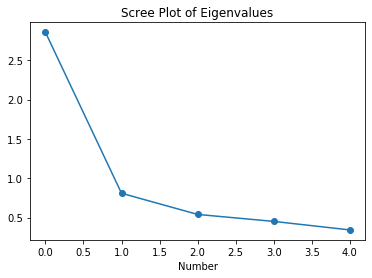

In [29]:
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Number')
plt.plot(eigenValues, 'o-')
plt.show()

Q. How many factors are required to describe adequately the space in which these data actually fall?

In [30]:
loadings2 = pd.DataFrame()
loadings2['Factor1'] = np.sqrt(eigenValues[0])*eigenVectors[:,0]
loadings2['Factor2'] = np.sqrt(eigenValues[1])*eigenVectors[:,1]
loadings2.index = stock.columns
np.round(loadings2, 2)

,Factor1,Factor2
X1,0.78,0.22
X2,0.77,0.46
X3,0.79,0.23
X4,0.71,-0.47
X5,0.71,-0.52


In [35]:
print("X1의 communality:", 0.78**2 + 0.22**2)
print("X2의 communality:", 0.77**2 + 0.46**2)
print("X3의 communality:", 0.79**2 + 0.23**2)
print("X4의 communality:", 0.71**2 + 0.47**2)
print("X5의 communality:", 0.71**2 + 0.52**2)

X1의 communality: 0.6568
X2의 communality: 0.8045
X3의 communality: 0.677
X4의 communality: 0.725
X5의 communality: 0.7745


Q. Compute the communality of each variable.

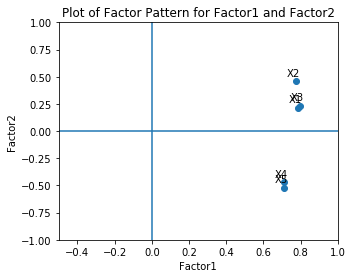

In [36]:
# Preplot(Before Rotation)
x = loadings2.Factor1 ; y = loadings2.Factor2
plt.figure(figsize = (5,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings2)):
    plt.text(x[i]-0.05, y[i]+0.05, loadings2.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-1,1)
plt.show()

Q. Compute the 2 x 2 matrix to rotate the Xi's 45 degrees anti-clockwise. Fill in a11, a12, a21, a22 on the following code.

In [40]:
A = pd.DataFrame([[np.sqrt(2)/2, -np.sqrt(2)/2], [np.sqrt(2)/2, np.sqrt(2)/2]],columns=('Factor1','Factor2'))
loadings_rotation = A.dot(loadings2.transpose()).transpose()
loadings_rotation.columns = ('Factor1','Factor2')
loadings_rotation

,Factor1,Factor2
X1,0.400781,0.707166
X2,0.222435,0.870061
X3,0.395929,0.727410
X4,0.838037,0.169848
X5,0.873861,0.133192


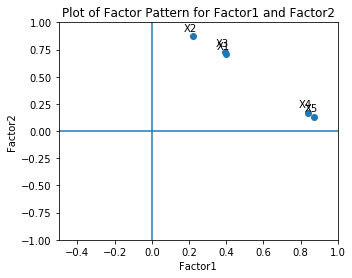

In [41]:
# Plot(After Rotation)
x = loadings_rotation.Factor1 ; y = loadings_rotation.Factor2
plt.figure(figsize = (5,4))
plt.title('Plot of Factor Pattern for Factor1 and Factor2')
plt.xlabel('Factor1') ; plt.ylabel('Factor2')
plt.scatter(x,y)
for i in range(len(loadings_rotation)):
    plt.text(x[i]-0.05, y[i]+0.05, loadings_rotation.index[i])
plt.axvline(x = 0) ; plt.axhline(y = 0) 
plt.xlim(-0.5,1); plt.ylim(-1,1)
plt.show()